In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movies-dataset/tmdb_movies_data.csv


In [2]:
# Im trying to build a model that takes in the name of a cast member, director and genre and predicts weather their next project is going to be a hit or a flop.

In [3]:
df = pd.read_csv('/kaggle/input/tmdb-movies-dataset/tmdb_movies_data.csv')

In [4]:
#dropping irrelevant columns
df = df.drop(['id', 'imdb_id', 'original_title', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'release_year', 'budget_adj', 'revenue_adj'], axis=1)

In [5]:
df.head()

,popularity,budget,revenue,cast,director,genres,vote_count,vote_average
0,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5
1,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1
2,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3
3,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5
4,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3


In [6]:
df['profit'] = df['revenue'] - df['budget']

df = df.drop(['revenue', 'budget'], axis = 1)

In [7]:
df.head()

,popularity,cast,director,genres,vote_count,vote_average,profit
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,1363528810
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,228436354
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,185238201
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,1868178225
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,1316249360


In [8]:
# now we have to create a label by taking in account the popularity, vote count, vote average and the profit made by the movies.

In [9]:
correlation = df[['popularity', 'vote_count', 'profit']].corr()
print(correlation)

            popularity  vote_count    profit
popularity    1.000000    0.800828  0.628991
vote_count    0.800828    1.000000  0.755905
profit        0.628991    0.755905  1.000000


In [10]:
# as we can see, the profit and popularity columns are not strictly corelated
# this can be explained by reasoning that not all people who were excited for a movie went to watch it or by taking into account that different movies have different budgets
# we expect this to effect the future success of a project involving the same cast and crew
# we can expect the rating of a movie to also have an impact on the future success of a project by the cast and crew

In [11]:
print(df['vote_count'].describe())
print(df['vote_average'].describe())

count    10866.000000
mean       217.389748
std        575.619058
min         10.000000
25%         17.000000
50%         38.000000
75%        145.750000
max       9767.000000
Name: vote_count, dtype: float64
count    10866.000000
mean         5.974922
std          0.935142
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64


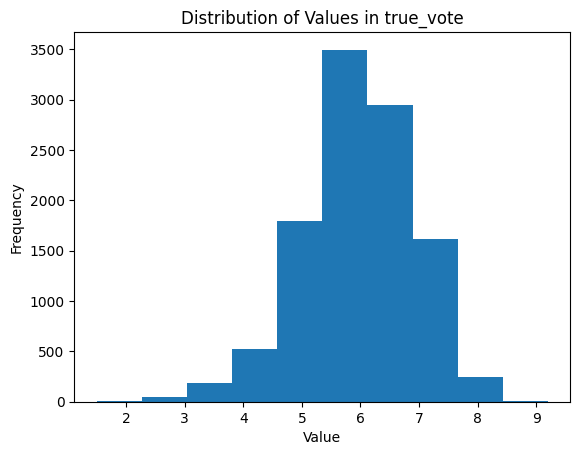

In [12]:
plt.hist(df['vote_average'])
plt.title('Distribution of Values in true_vote')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [13]:
# calculating the true rating
# we will add a reliability score to every rating on the basis of how many people actually voted for the movie
df['true_vote'] = (df['vote_average'] + (df['vote_count'] / df['vote_count'].max())) * 0.10
df = df.drop(['vote_average', 'vote_count'], axis = 1)
df.head()

,popularity,cast,director,genres,profit,true_vote
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,1363528810,0.706947
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,228436354,0.773325
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,185238201,0.655392
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,1868178225,0.804182
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,1316249360,0.760173


In [14]:
print(df['true_vote'].describe())

count    10866.000000
mean         0.599718
std          0.095181
min          0.150102
25%          0.540358
50%          0.601860
75%          0.662311
max          0.920143
Name: true_vote, dtype: float64


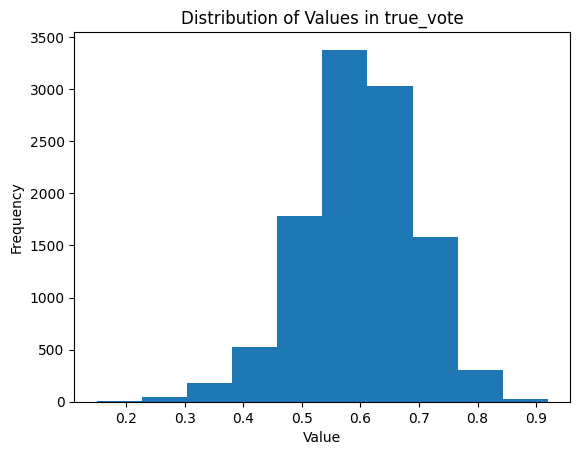

In [15]:
plt.hist(df['true_vote'])
plt.title('Distribution of Values in true_vote')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [16]:
df['profit'].describe()

count    1.086600e+04
mean     2.519762e+07
std      9.658799e+07
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      9.083358e+06
max      2.544506e+09
Name: profit, dtype: float64

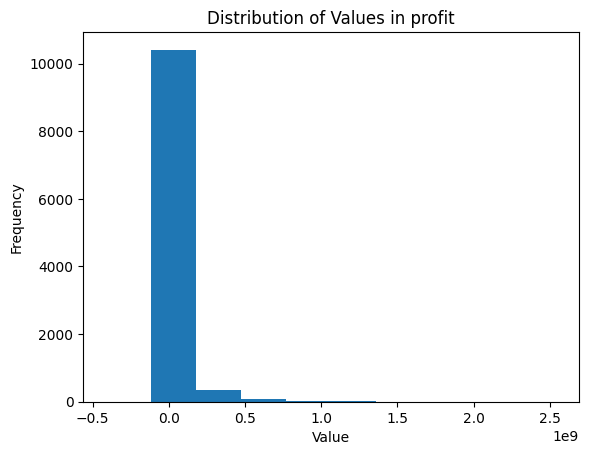

In [17]:
plt.hist(df['profit'])
plt.title('Distribution of Values in profit')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [18]:
# calculating investability 
# the profits made by a movie will effect the chances of a similar project being funded in the future
# subsequently, the amount of funding is correlated to the success of a movie
# while calculating this metric, movies will be rated from 1-10 and the movies that made a loss will be rated 0

# adjusting the profit by assuming that 25% of the budget (although some movies end up spending more money on marketing than they do on production) 
df['profit'] = df['profit'] - (df['profit'] * 0.25)

# trimming away the movies that made a loss
df['profit'] = df['profit'].apply(lambda x: 0 if x < 0 else x)

# calculating investability
df['investability'] = df['profit'] / df['profit'].max()

df = df.drop(['profit'], axis = 1)

df.head()

,popularity,cast,director,genres,true_vote,investability
0,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,0.706947,0.535872
1,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,0.773325,0.089776
2,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,0.655392,0.072799
3,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,0.804182,0.734201
4,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,0.760173,0.517291


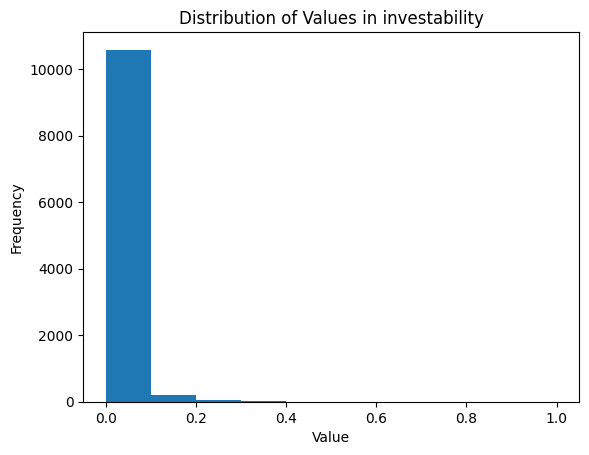

In [19]:
plt.hist(df['investability'])
plt.title('Distribution of Values in investability')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

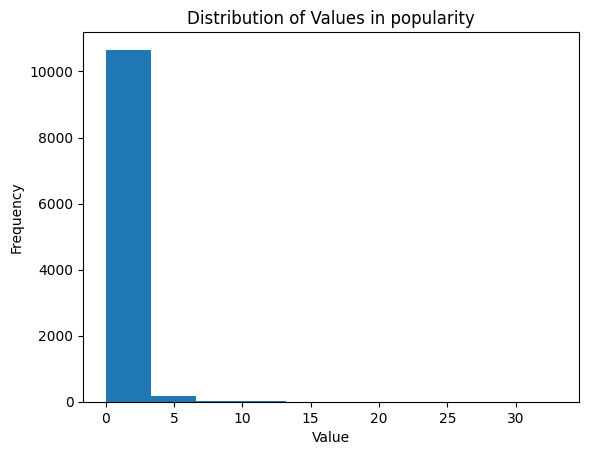

In [20]:
plt.hist(df['popularity'])
plt.title('Distribution of Values in popularity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [21]:
# squishing the popularity column down
diff = df['popularity'].max() - df['popularity'].min()
df['popularity'] = (df['popularity'] - df['popularity'].min()) / diff

df.head()

,popularity,cast,director,genres,true_vote,investability
0,1.000000,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,0.706947,0.535872
1,0.861582,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,0.773325,0.089776
2,0.397519,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,0.655392,0.072799
3,0.338724,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,0.804182,0.734201
4,0.283000,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,0.760173,0.517291


In [22]:
df['popularity'].describe()

count    10866.000000
mean         0.019596
std          0.030322
min          0.000000
25%          0.006291
50%          0.011635
75%          0.021638
max          1.000000
Name: popularity, dtype: float64

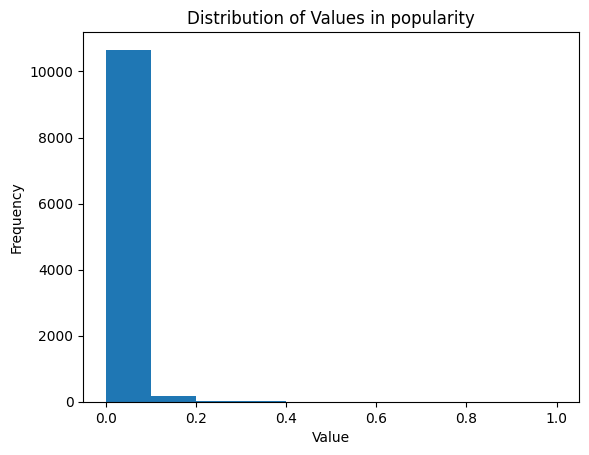

In [23]:
plt.hist(df['popularity'])
plt.title('Distribution of Values in popularity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [24]:
# now we will create our label using popularity, true_vote and investability
# assuming that popularity has a weightage of 80%, and true_vote and investability have the weightage of 10% respectively.
df['label'] = df['popularity'] * 0.8 +  df['true_vote'] * 0.1 + df['investability'] * 0.1
df = df.drop(['popularity', 'true_vote', 'investability'], axis = 1)

In [25]:
df.head()

,cast,director,genres,label
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,0.924282
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,0.775575
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,0.390834
3,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,0.424817
4,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,0.354146


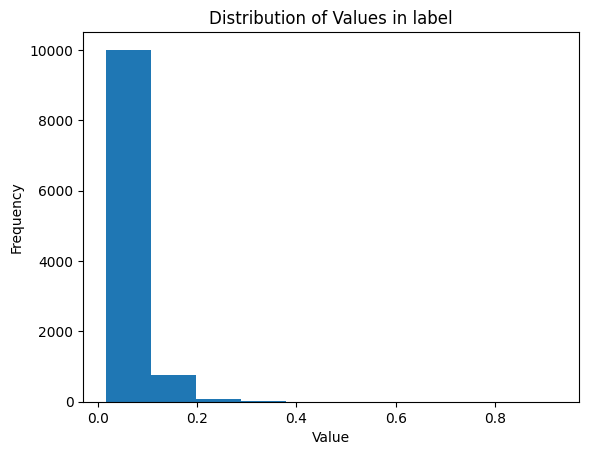

In [26]:
plt.hist(df['label'])
plt.title('Distribution of Values in label')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show() 

In [27]:
# separating the cast and genre names into individual entries
df['cast'] = df['cast'].str.split('|')
df['director'] = df['director'].str.split('|')
df['genres'] = df['genres'].str.split('|')

df = df.explode('cast').reset_index(drop=True)
df = df.explode('director').reset_index(drop=True)
df = df.explode('genres').reset_index(drop=True)

df.rename(columns={'genres': 'genre', 'cast': 'actor'}, inplace=True)

In [28]:
df.head()

,actor,director,genre,label
0,Chris Pratt,Colin Trevorrow,Action,0.924282
1,Chris Pratt,Colin Trevorrow,Adventure,0.924282
2,Chris Pratt,Colin Trevorrow,Science Fiction,0.924282
3,Chris Pratt,Colin Trevorrow,Thriller,0.924282
4,Bryce Dallas Howard,Colin Trevorrow,Action,0.924282


In [29]:
df.shape

(144265, 4)

In [30]:
# encoding the categorical values

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['actor'] = le.fit_transform(df['actor'])
mapping_actor = dict(zip(le.classes_, range(len(le.classes_))))
df['director'] = le.fit_transform(df['director'])
mapping_director = dict(zip(le.classes_, range(len(le.classes_))))
df['genre'] = le.fit_transform(df['genre'])
mapping_genre = dict(zip(le.classes_, range(len(le.classes_))))

num_actor = len(mapping_actor)
num_director = len(mapping_director)
num_genre = len(mapping_genre)

# converting the continous label into a binary label

df['label'] = df['label'].apply(lambda x: 1 if x >= 0.5 else 0)

In [31]:
# extracting this dataframe for use in app

import pandas as pd

df.to_csv('output.csv', index=False)

In [32]:
print

<function print>

In [33]:
print(num_actor, num_director, num_genre)

19027 5363 21


In [34]:
df.isnull().sum()

actor       0
director    0
genre       0
label       0
dtype: int64

In [35]:
# training the model

from sklearn.model_selection import cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
X = df.drop(columns = ['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {score * 100}%')

Accuracy: 99.95147818251135%


In [38]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model = LogisticRegression(max_iter = 1000)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print(f'Cross-Validation Score: {scores.mean() * 100} (+/- {scores.std() * 2})')

Cross-Validation Score: 99.9618758349053 (+/- 6.929045564396662e-05)


In [39]:
# outputting results

model.fit(X, y)

LogisticRegression(max_iter=1000)

In [40]:
input_features = [[1, 1, 1], [1, 1, 2]]
probabilities = model.predict_proba(input_features)
probabilities

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.9981218, 0.0018782],
       [0.9981034, 0.0018966]])

In [41]:
# For the first input sample [1, 1, 1], the model predicts a probability of approximately 0.998 for class 1 and a probability of approximately 0.002 for class 0.

# Similarly, for the second input sample [1, 1, 2], the model predicts a probability of approximately 0.998 for class 1 and a probability of approximately 0.002 for class 0.